In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
xls = pd.ExcelFile("online_retail_II.xlsx")
df = pd.read_excel(xls, "Year 2010-2011")

In [3]:
df.shape

(541910, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
user_counts = df["Customer ID"].value_counts()
item_counts = df["StockCode"].value_counts()

print("Users:", len(user_counts))
print("Items:", len(item_counts))

Usuarios: 4372
Items: 4070


In [7]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [8]:
df_clean = df.copy()

df_clean = df_clean.drop_duplicates()
df_clean = df_clean.dropna(subset=["Customer ID", "StockCode"])
df_clean = df_clean[df_clean["Quantity"] > 0]
df_clean = df_clean[df_clean["Price"] > 0]

In [9]:
df_clean.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [10]:
df_clean["StockCode"] = df_clean["StockCode"].astype(str).str.upper().str.strip()

exclude_list = [
    "S", "POST", "PADS", "M", "GIFT",
    "GIFT_0001_90", "GIFT_0001_80", "GIFT_0001_70", "GIFT_0001_60",
    "GIFT_0001_50", "GIFT_0001_40", "GIFT_0001_30",
    "GIFT_0001_20", "GIFT_0001_10",
    "DOT", "DCGSSGIRL", "DCGSSBOY",
    "DCGS0076", "DCGS0070", "DCGS0069", "DCGS0004", "DCGS0003",
    "C2", "BANK CHARGES", "B", "AMAZONFEE",
    "SP1002", "TEST001", "TEST002",
    "ADJUST", "ADJUST2",
]

df_clean = df_clean[~df_clean["StockCode"].isin(exclude_list)]
df_clean = df_clean[~df_clean["StockCode"].str.startswith("DCGS")]

In [11]:
df_clean.shape

(391150, 8)

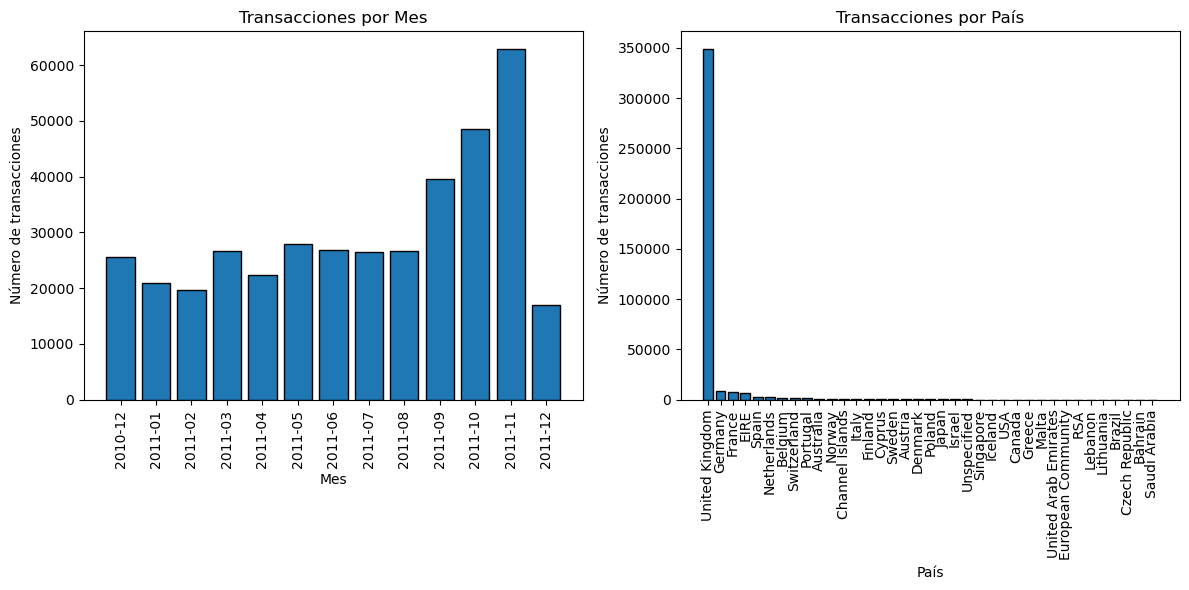

In [ ]:
transactions_by_month = df_clean.groupby(df["InvoiceDate"].dt.to_period("M")).size()
transactions_by_country = df_clean["Country"].value_counts()

In [13]:
df_filtered = df_clean.copy()
df_filtered = df_filtered[df_filtered["Country"] == "United Kingdom"]
df_filtered = df_filtered[df_filtered["InvoiceDate"].dt.year == 2011]
df_filtered = df_filtered[df_filtered["InvoiceDate"].dt.month.between(5, 8)]

In [ ]:
user_counts = df_filtered["Customer ID"].value_counts()
item_counts = df_filtered["StockCode"].value_counts()

print("Users:", len(user_counts))
print("Items:", len(item_counts))

Usuarios: 2073
Items: 2912


In [16]:
df_filtered.to_csv("online_retail_II_clean.csv", index=False)